<center>
    
## <font color='maroon'>ASTR 21100</font>
## <font color='maroon'>Final Project: Classifying light curves with convolutional neural networks</font>
        
## <font color='blue'>Primary instructor(s) for this project: Andrey Kravtsov</font>
    
### <font color='blue'>50 points + possible extra credit points</font>

    
### <font color='blue'>Part I is due Fri, Feb 28 by 9pm; Part II is due Fri, Mar 7 , 9pm</font>

### <font color='blue'>Final version is due Tue, Mar 11, 9pm</font>


<p>



![var_stars.png](attachment:var_stars.png)

### <font color='blue'>Overview</font>

In this project, you will use convolutional neural networks to classify light curves from the [Optical Gravitational Lensing Experiment (OGLE)](https://ogledb.astrouw.edu.pl/~ogle/OCVS/), which has catologued thousands of variable stars.  

Computational methods and analysis techniques that you will use include:

* Creating 2D data visualizations and manipulating images

* Convolutional neural networks and deep learning

* Measuring the accuracy of machine learning results

### <font color='blue'>Background</font>

Many astronomical objects emit flux that varies with time. When variations of measured flux (often expressed as a magnitude) are plotted over time, the resulting graph is called a light curve.

Stars, in particular, vary for a variety of reasons. Although all star (including our Sun!) vary by a small amount, some stars vary a lot. The shape and form of the star's light curve can be used to understand what type of star we are observing and glean information about physical conditions within the star.

However, classifying light curves in general presents challenges. Most light curves are irregularly sampled as a function of time, and often have gaps in coverage. Unfortunately, standard statistical methods that can be applied to well-sampled light curves may not work at all for sparsely sampled ones. Additionally, while it is easy to create a high-quality training sample of labeled light curves, there are many more light curves that are ambiguous and cannot confidently be labeled. This means that feature-based machine learning classifiers such as RandomForest are not able to perform well on large light curve datasets except under ideal data conditions.

In this project you will use a sample of variable star light curves from the [OGLE experiment](https://ogle.astrouw.edu.pl/), which has been operating for a couple of decades and is designed to detect variable stars. The experiment produced a large sample of variable stars of different types. As was hinted at in the previous paragraph, these light curves cover different timespans, and gaps in coverage are frequent. In this project, you will devise an algorithm that can classify these light curves with a high degree of confidence despite these challenges.

More specifically, you will develop a classification scheme using a Convolutional Neural Network (CNN) method. Your CNN will learn to discriminate between light curves from a set of training data, and you will test the accuracy of the method using a set of testing data. The CNN method is known to produce excellent results in classifying objects in images. In this project you will explore some ideas of how light curves can be converted into images for classification with a CNN, which avoids some of the issues with classification mentioned above.

### <font color='blue'>Preparatory steps</font>

**(1) Complete required background reading**

* Read background information about convolutional neural networks. This can be found in the [Section 9.2]() of the notes and in Chapters 2 and 8 of Francois Chollet's book on deep learning (see PDF files of the chapters in the #proj_varstars_class channel on Slack).  Chollet is the creator of Keras, the package that you will be using to create your CNN.


* Read [Mahabal+2017](https://arxiv.org/pdf/1709.06257.pdf). This paper outlines how to turn light curves into images that can be fed into a CNN. It also describes different CNN architectures that you can try. Read sections III and IV in detail and skim the others according to your interest.


* Familiarize yourself with the [scikit-learn](https://scikit-learn.org/stable/index.html) Python library, which contains implementations of several machine learning techniques, as well as many functions that are useful for machine learning. Some functions that might be useful for this project include:
  * [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
  * [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
  * [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


* This is optional, but you may be interested to review how light curves of different types of variable stars look in the OGLE database [here](http://ogle.astrouw.edu.pl/atlas/). An overview of variable stars and their light curves can be found in this [PDF file](https://www.aavso.org/sites/default/files//Variable%20Star%20Classification%20and%20Light%20Curves%20Manual%202.1.pdf).

<br>


**(2) Install necessary Python packages**

You will build your CNN with the [Keras](https://keras.io/) Python package, which is part of Google's [Tensorflow](https://www.tensorflow.org/). You can install Tensorflow in Ananconda with the following commands:

```
# Upgrade to latest pip
pip install --upgrade pip

# Install Tensorflow
pip install tensorflow
```

Once you have installed Tensorflow, you should be able to access Keras by running the following code:

```
from tensorflow import keras
```

If you run into any issues during the installation process, please reach out for help.

<br>

**(3) Get access to the project data**    

The data for this project is stored on Google Drive [here](https://drive.google.com/file/d/1n8YLnFRCDfSHKVkgIALD1CwvyPW0ZBuj/view?usp=sharing) (size 128 Mb). Download a copy of the dataset to your laptop. You can also copy the dataset to your Google Drive and use Google Colab to complete this project. If you choose to go this route, please reach out for assistance in connecting the dataset to your project notebook.

There are 50,000 light curves in the dataset, and each has been assigned a unique ID. You can use the provided `gcl` function below to read in light curves, as well as their OGLE IDs and assigned type. (If you are curious about a certain object, you can use the OGLE ID to look it up in the OGLE database!) For efficiency purposes, the light curves are stored in Python Numpy files with the extension `.npy`. If you have not worked with `.npy` files before, you can read more about them [here](https://numpy.org/devdocs/reference/generated/numpy.lib.format.html).

Make sure that you can run the below code, which loads in a specific light curve given a  curve ID. The code also contains a list with all possible IDs for the provided dataset. Though you are welcome to devise different ways of loading in and working with the data, keep in mind that the dataset is quite large, and loading in too many light curves at once may cause issues.

### <font color='blue'>Project description</font>

**Part I: Preprocessing (20 points)**

First, prepare the light curves to be classified by the CNN. Complete the following steps:

1. Write a function that takes in a light curve and returns a 2D array representing the dm-dt image of that light curve. The process of creating dm-dt images is described in [Mahabal+2017](https://arxiv.org/pdf/1709.06257.pdf). Note that you will have to adjust the bin boundaries in dm-dt space to better suit the OGLE data. (10 points)

2. Write a function that takes in one or more dm-dt images and produces a visualization of the image(s). Stacking multiple dm-dt images for objects in the same class will create a composite image like those shown in [Mahabal+2017](https://arxiv.org/pdf/1709.06257.pdf). The goal is for your composite images to be as visually distinct as possible between classes, so try adjusting the bin boundaries in dm-dt space to achieve this. (2 points)

3. Create dm-dt image arrays for every light curve in the dataset. Also create arrays of labels for the light curves based on their known classifications. The easiest way to do this is to assign each class an integer. When you do this, make sure to write down this encoding in your notebook so that you (and we) can keep the classes straight! (3 points)

4. Divide the data into testing, training and validation sets. Stack the images in each set into data cubes so that they can be fed into the Keras CNN. Make the first trial runs and present preliminary results of your calculations. (5 points)

Please note: Once you have figured out how to make dm-dt images, it is best to do steps 3 and 4 only once, and save the output to a file that can be loaded in each time you open your notebook again. Recreating the images each time will be a very slow and very intensive process for your computer. Please reach out if you need help with saving the images to a file!

**Part II: The CNN (30 points)**

Next, construct, train, and test your CNN using the prepared data. Complete the following steps:

1. Use Keras to define the CNN, following the "shallow" architecture outlined in [Mahabal+2017](https://arxiv.org/pdf/1709.06257.pdf). (5 points)

2. Train the CNN on the training data from Part I above. The validation data should be used during training as well, though it will be fed in separately from the training data. (5 points)

3. Test the CNN on the testing data from Part I above. Create a confusion matrix showing the results of your classification. (5 points)

4. Investigate the effects of using deeper architectures. Use information you read in the chapters from Chollet's book or the deeper architecture from [Mahabal+2017](https://arxiv.org/pdf/1709.06257.pdf). You are encouraged to explore your own architectures rather than just copying the example ones. Explore alternatives and try to improve the accuracy of classification as much as you can. Present the results of your best alternative architecture in the form of a confusion matrix and overall accuracy. (15 points)

### <font color='blue'>Extra-credit: experimenting with data augmentation (10 extra-credit points)</font>

One way that training efficiency can be improved is by using a trick called *data augmentation* to increase the size of the training sample. In this approach one takes existing light curves with reliable classifications and modifies them significantly enough to be different, but not too much that it would not be possible to classify the lightcurve. Such modification can take the form of introducing a gap in the data, resampling it to have a new period,  perturbing certain parts of the light curve with random Gaussian noise, etc. In consultation with the instructors, try to implement some of these strategies. Retrain your network on your augmented training data and try to improve the accuracy of classification.


### Codes to

In [3]:
from google.colab import files
uploaded = files.upload()


Saving proj_light_curves_data.zip to proj_light_curves_data.zip


In [4]:
!unzip proj_light_curves_data.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/curves/11958.npy  
  inflating: dataset/curves/11973.npy  
  inflating: dataset/curves/9.npy    
  inflating: dataset/curves/13.npy   
  inflating: dataset/curves/22.npy   
  inflating: dataset/curves/34.npy   
  inflating: dataset/curves/40.npy   
  inflating: dataset/curves/69.npy   
  inflating: dataset/curves/70.npy   
  inflating: dataset/curves/110.npy  
  inflating: dataset/curves/140.npy  
  inflating: dataset/curves/167.npy  
  inflating: dataset/curves/168.npy  
  inflating: dataset/curves/185.npy  
  inflating: dataset/curves/363.npy  
  inflating: dataset/curves/392.npy  
  inflating: dataset/curves/458.npy  
  inflating: dataset/curves/471.npy  
  inflating: dataset/curves/478.npy  
  inflating: dataset/curves/508.npy  
  inflating: dataset/curves/545.npy  
  inflating: dataset/curves/550.npy  
  inflating: dataset/curves/557.npy  
  inflating: dataset/curves/569.npy  
  inflating: dataset/curves/607.n

In [5]:
#Set this variable to be the path to the downloaded proj_light_curves_data folder
#If you put the data in the same directory as your notebook, this can be set to 'proj_light_curves_data/'
path_to_data = 'dataset/'

In [6]:
#Defines lists containing the IDs of different variable types in the database
#You can iterate over these lists to get all star IDs of a certain type
#Or you can pull a random entry from a list to get a random star for that class
cepheid = list(range(1,5001))
ecl = list(range(5001,10001))
rrly = list(range(10001,15001))
ds = list(range(15001,20001))
lpv = list(range(20001,25001))

#Defines a list containing the IDs of all stars in the database
#Iterate over this to iterate over every star
all_stars = list(range(1, 25001))

In [7]:
import os
import numpy as np

def glc(lc_id, return_extras=False, path_to_data=None):
    '''
    Gets the data for a given light curve. glc = "Get Light Curve"

    Parameters
    ----------
    lc_id : integer
        Light curve ID in the range [1,50000]

    return_extras: Boolean : default=False
        If True, the function will return all 3 items under "Returns"
        If False, the function will only return the light curve (lc)

    Returns
    -------
    lc : Numpy array with shape (3, len(lc))
        The light curve. lc[0] gives the time values, lc[1] gives the
        magnitudes, and lc[2] gives the magnitude errors.

    lc_type : str
        The type of the light curve. Can be 'cepheid', 'ecl', 'rrly',
        'ds' or 'lpv.' Returned only if return_extras is True.

    OGLE_id : str
        The OGLE ID of the light curve. Can be used to look up a star
        in the OGLE database. Returned only if return_extras is True.

    '''
    if path_to_data is None:
        print('Set path_to_data before using gcl!')

    lc = np.load(os.path.join(path_to_data, 'curves', str(lc_id) + '.npy'))
    with open(os.path.join(path_to_data, 'info.txt')) as file:
        lc_data = [line for line in file if line.startswith(str(lc_id))][0].split()
    lc_type, OGLE_id = lc_data[1:]
    if return_extras: return lc, lc_type, OGLE_id
    return lc

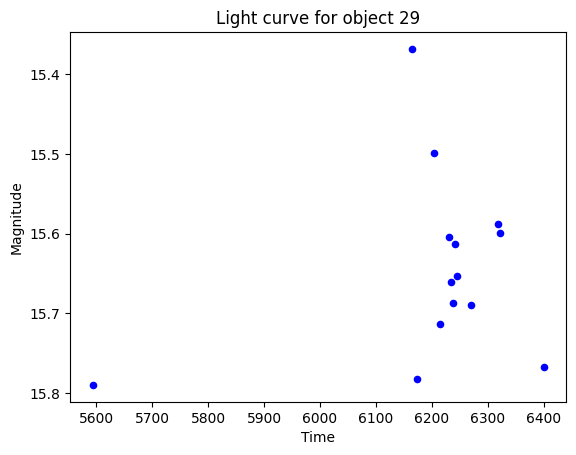

In [9]:
import matplotlib.pyplot as plt


lc_id = 29
path_to_data='dataset/'

lc = glc(lc_id, path_to_data=path_to_data)
plt.scatter(lc[0], lc[1], s=20, c='b')

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Light curve for object ' + str(lc_id))
plt.gca().invert_yaxis()
plt.show()

### <font color='blue'>**Part I**</font>

In [10]:
pip install tensorflow

In [11]:
from tensorflow import keras

In [28]:
import numpy as np

# Bin size decided as per testing in cell ahead
def compute_dm_dt_image(time, magnitude, bins=(60, 60), dt_range=(0.01, 100), dm_range=(-3, 3)):
    dt = np.abs(np.subtract.outer(time, time))
    dm = np.abs(np.subtract.outer(magnitude, magnitude))
    valid_mask = (dt >= dt_range[0]) & (dt <= dt_range[1]) & (dm >= dm_range[0]) & (dm <= dm_range[1])
    dt, dm = dt[valid_mask], dm[valid_mask]

    H, xedges, yedges = np.histogram2d(dm, np.log10(dt), bins=bins, range=[dm_range, np.log10(dt_range)])
    return H, xedges, yedges

In [29]:
import matplotlib.pyplot as plt

def plot_dm_dt_image(H, xedges, yedges, title="dm-dt Image", cmap="inferno"):
    plt.figure(figsize=(8,6))
    plt.imshow(H.T, origin="lower", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cmap)
    plt.colorbar(label="Counts")
    plt.xlabel("Δm (Magnitude Difference)")
    plt.ylabel("log10(Δt) (Time Difference)")
    plt.title(title)
    plt.show()

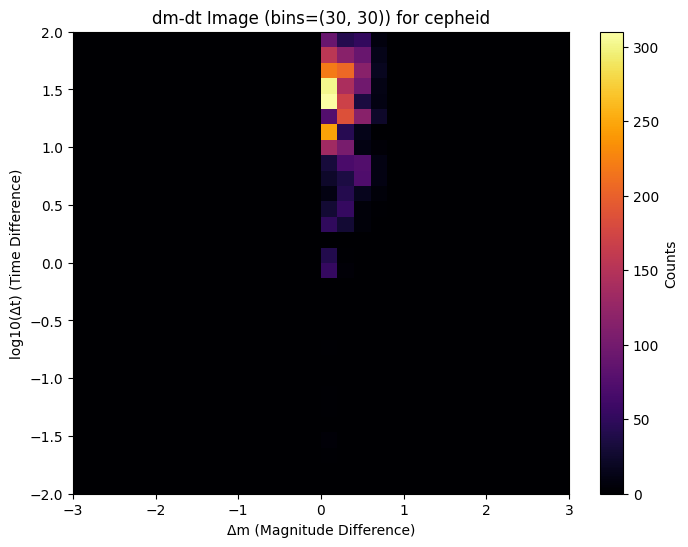

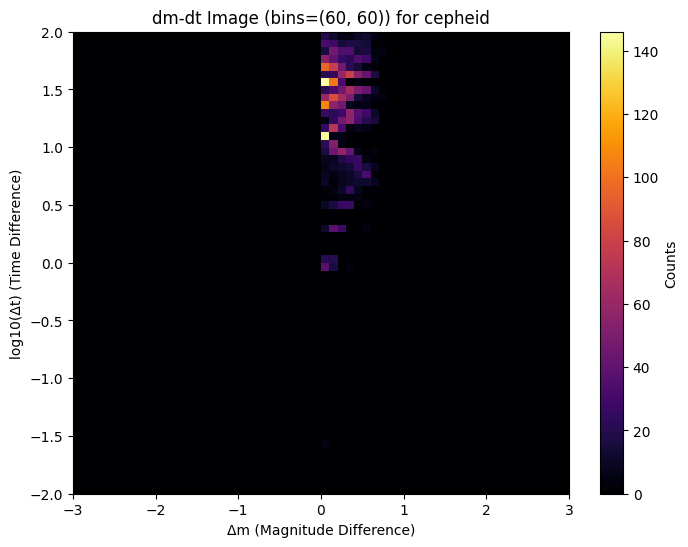

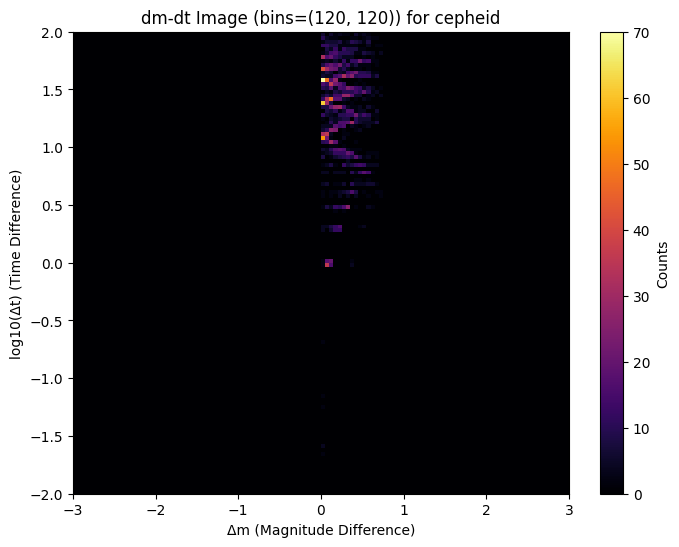

In [30]:
# Exploring bin size as per feedback from Part I

lc_id = 1001
lc, lc_type, OGLE_id = glc(lc_id, return_extras=True, path_to_data=path_to_data)

time = lc[0]
magnitude = lc[1]

# Try different binning settings
bin_settings = [(30,30), (60, 60), (120,120)]
for bins in bin_settings:
    H, xedges, yedges = compute_dm_dt_image(time, magnitude, bins=bins)
    plot_dm_dt_image(H, xedges, yedges, title=f"dm-dt Image (bins={bins}) for {lc_type}")

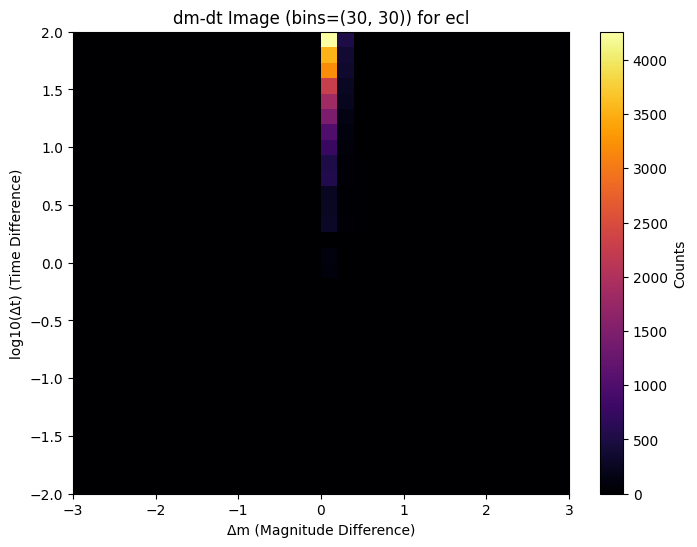

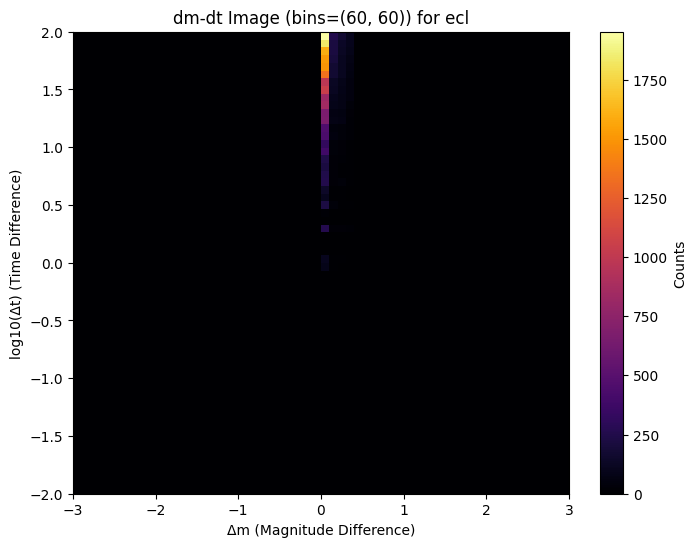

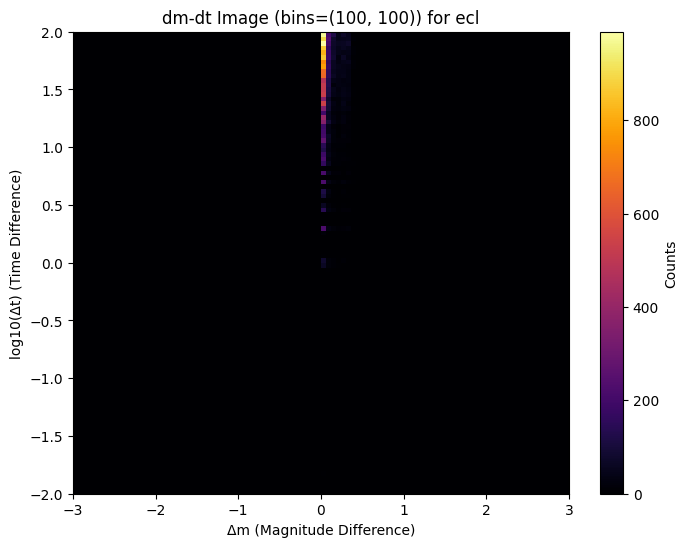

In [31]:
# Exploring bin size as per feedback from Part I

lc_id = 7001
lc, lc_type, OGLE_id = glc(lc_id, return_extras=True, path_to_data=path_to_data)

time = lc[0]
magnitude = lc[1]

# Try different binning settings
bin_settings = [(30,30), (60, 60), (100,100)]
for bins in bin_settings:
    H, xedges, yedges = compute_dm_dt_image(time, magnitude, bins=bins)
    plot_dm_dt_image(H, xedges, yedges, title=f"dm-dt Image (bins={bins}) for {lc_type}")

In [ ]:
# A 60 × 60 bin size provides a balanced trade-off between resolution and noise

# It avoids avoiding the sparsity seen in higher bin counts (e.g., 100 × 100)
# and the oversmoothing of lower counts (e.g., 30 × 30)

In [46]:
def process_light_curves(path_to_data, lc_ids):
    """
    Processes light curves and creates dm-dt images with corresponding labels.

    Parameters:
    - path_to_data: path to the dataset
    - lc_ids: list of light curve IDs

    Returns:
    - dm_dt_images: NumPy array of processed dm-dt images
    - labels: NumPy array of encoded class labels
    - class_to_int: Dictionary mapping class names to integer labels
    """
    dm_dt_images = []
    labels = []
    images_by_class = {}
    class_labels = set()

    for lc_id in lc_ids:
        lc, lc_type, OGLE_id = glc(lc_id, return_extras=True, path_to_data=path_to_data)
        time, magnitude = lc[0], lc[1]

        # Compute dm-dt image
        dm_dt_image = compute_dm_dt_image(time, magnitude, bins=(60,60))

        # Store images by class
        if lc_type not in images_by_class:
            images_by_class[lc_type] = []
        images_by_class[lc_type].append(dm_dt_image)

        dm_dt_images.append(dm_dt_image)
        labels.append(lc_type)
        class_labels.add(lc_type)

    # Encode class labels as integers
    class_to_int = {cls: i for i, cls in enumerate(sorted(class_labels))}
    encoded_labels = [class_to_int[label] for label in labels]

    print("Class to integer mapping:", class_to_int)

    return np.array(dm_dt_images), np.array(encoded_labels), class_to_int, images_by_class


In [44]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_composite_dm_dt(images_by_class, class_labels, title="Composite dm-dt Images"):
    """
    Creates and visualizes composite dm-dt images by averaging multiple images for each class.

    Parameters:
    - images_by_class: dictionary {class_label: list_of_images}
    - class_labels: list of class names corresponding to the images
    - title: title for the overall visualization

    Returns:
    - None (displays the images)
    """
    num_classes = len(images_by_class)
    fig, axes = plt.subplots(1, num_classes, figsize=(5 * num_classes, 5))

    if num_classes == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, class_label in enumerate(class_labels):
        # Stack all images in this class and compute the average
        composite_image = np.mean(images_by_class[class_label], axis=0)

        # Display the composite image
        ax = axes[i]
        ax.imshow(composite_image, cmap="inferno", origin="lower")
        ax.set_title(f"{class_label}")
        ax.set_xlabel("Δm (Magnitude Difference)")
        ax.set_ylabel("log10(Δt) (Time Difference)")
        fig.colorbar(ax.imshow(composite_image, cmap="inferno", origin="lower"), ax=ax, label="Counts")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

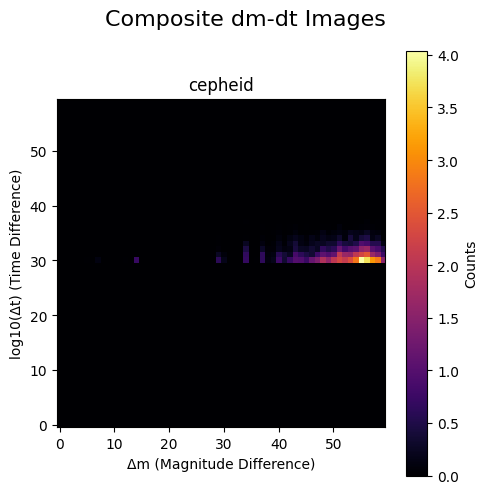

In [45]:
visualize_composite_dm_dt(images_by_class, list(class_to_int.keys()), title="Composite dm-dt Images")


In [60]:
import numpy as np

def process_light_curves(path_to_data, lc_ids, save_to_file=True):
    """
    Processes light curves to create dm-dt images and label arrays.

    Parameters:
    - path_to_data (str): Path to the dataset.
    - lc_ids (list): List of light curve IDs to process.

    Returns:
    - dm_dt_images (numpy array): Processed dm-dt images (shape: num_samples, 60, 60).
    - labels (numpy array): Encoded class labels.
    - class_to_int (dict): Mapping of class names to integer labels.
    - images_by_class (dict): Dictionary of images grouped by class.
    """
    dm_dt_images = []
    labels = []
    images_by_class = {}
    class_labels = set()

    for lc_id in lc_ids:
        try:
            # Load light curve
            lc, lc_type, _ = glc(lc_id, return_extras=True, path_to_data=path_to_data)
            time, magnitude = lc[0], lc[1]

            # Generate dm-dt image (force 60x60 size)
            H, _, _ = compute_dm_dt_image(time, magnitude, bins=(60, 60))
            H = np.array(H)  # Convert to NumPy array

            # Ensure image has the correct shape
            if H.shape != (60, 60):
                print(f"Warning: Light curve {lc_id} has an incorrect shape {H.shape}, skipping...")
                continue  # Skip incorrect images

            # Store images by class
            if lc_type not in images_by_class:
                images_by_class[lc_type] = []
            images_by_class[lc_type].append(H)

            dm_dt_images.append(H)
            labels.append(lc_type)
            class_labels.add(lc_type)

        except Exception as e:
            print(f"Error processing light curve {lc_id}: {e}")
            continue

    # Encode class labels as integers
    class_to_int = {cls: i for i, cls in enumerate(sorted(class_labels))}
    encoded_labels = np.array([class_to_int[label] for label in labels])

    # Convert list of images to a NumPy array (ensuring uniform shape)
    dm_dt_images = np.array(dm_dt_images)  # Shape: (num_samples, 60, 60)

    if save_to_file:
        np.save("dm_dt_images.npy", dm_dt_images)
        np.save("labels.npy", encoded_labels)
        np.save("class_to_int.npy", class_to_int)
        print("Processed dm-dt images and labels saved!")

    print("Class to integer mapping:", class_to_int)

    return dm_dt_images, encoded_labels, class_to_int, images_by_class


In [70]:
path_to_data = "dataset/"
lc_ids = list(range(1, 25001))

dm_dt_images, labels, class_to_int, images_by_class = process_light_curves(path_to_data, lc_ids, save_to_file=True)


Processed dm-dt images and labels saved!
Class to integer mapping: {'cepheid': 0, 'ds': 1, 'ecl': 2, 'lpv': 3, 'rrly': 4}


In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_and_split_data():
    """
    Loads saved dm-dt images and splits into training, validation, and test sets.

    Returns:
    - X_train, X_val, X_test: Image datasets for training, validation, and testing.
    - y_train, y_val, y_test: Encoded labels for each dataset.
    - num_classes: Number of unique classes.
    """

    # Check if files exist
    if not os.path.exists("dm_dt_images.npy") or not os.path.exists("labels.npy"):
        raise FileNotFoundError("Error: Processed data files not found! Run process_light_curves() first.")

    # Load saved data
    dm_dt_images = np.load("dm_dt_images.npy")
    labels = np.load("labels.npy")
    class_to_int = np.load("class_to_int.npy", allow_pickle=True).item()

    # Ensure images have nonzero max before normalization
    if np.max(dm_dt_images) == 0:
        raise ValueError("Error: dm_dt_images contains only zeros or uninitialized values!")

    # Normalize images to range [0,1] for CNN
    dm_dt_images = dm_dt_images / np.max(dm_dt_images)

    # Split into training (60%), validation (20%), and test (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(dm_dt_images, labels, test_size=0.4, random_state=42, stratify=labels)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Reshape to (num_samples, 60, 60, 1) for CNN
    X_train = X_train.reshape(-1, 60, 60, 1)
    X_val = X_val.reshape(-1, 60, 60, 1)
    X_test = X_test.reshape(-1, 60, 60, 1)

    # Convert labels to categorical format for CNN
    num_classes = len(class_to_int)
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
    y_test = to_categorical(y_test, num_classes)

    print(f"Training: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

    return X_train, X_val, X_test, y_train, y_val, y_test, num_classes


***SHALLOW ARCHITECTURE IN MAHABAL+2017***

**Implemented exactly below**

layers = [

InputLayer,

Conv2DLayer(32, size:3x3, rectify),

DropoutLayer(0.1),

DenseLayer(128),

DropoutLayer(0.25),

DenseLayer(128),

DenseLayer(all, softmax),

]

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, InputLayer

def mahabal_shallow_cnn(input_shape, num_classes):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        Dropout(0.1),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [92]:
# Load dataset and split into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_and_split_data()

# Define model parameters
input_shape = (60, 60, 1)

# Build and compile the CNN model
shallow_cnn = mahabal_shallow_cnn(input_shape, num_classes)

# Train the CNN
history = shallow_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

# Evaluate on test set
test_loss, test_acc = shallow_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model
shallow_cnn.save("mahabal_shallow_model.h5")


Training: (15000, 60, 60, 1), Validation: (5000, 60, 60, 1), Test: (5000, 60, 60, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 607ms/step - accuracy: 0.3614 - loss: 1.4260 - val_accuracy: 0.5162 - val_loss: 1.0600
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 177s 504ms/step - accuracy: 0.5181 - loss: 1.0770 - val_accuracy: 0.5666 - val_loss: 0.9295
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 515ms/step - accuracy: 0.5747 - loss: 0.9559 - val_accuracy: 0.6360 - val_loss: 0.8445
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 499ms/step - accuracy: 0.6292 - loss: 0.8540 - val_accuracy: 0.6684 - val_loss: 0.7704
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 494ms/step - accuracy: 0.6543 - loss: 0.8083 - val_accuracy: 0.7240 - val_loss: 0.6962
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 499ms/step - accuracy: 0.6839 - loss: 0.7472 - val_accuracy: 0.7360 - val_loss: 0.6504
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 496ms/step - accuracy: 0.7082 - loss: 0.7011 - val_accuracy: 0.7478 - val_loss: 0.6123
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 491ms/step - accuracy: 0.7263 -

Test Accuracy: 0.7860


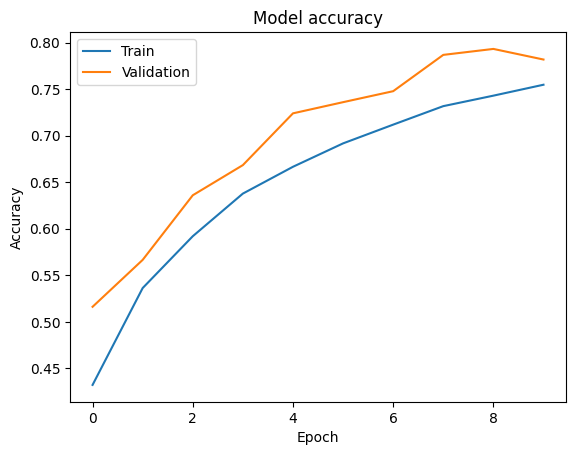

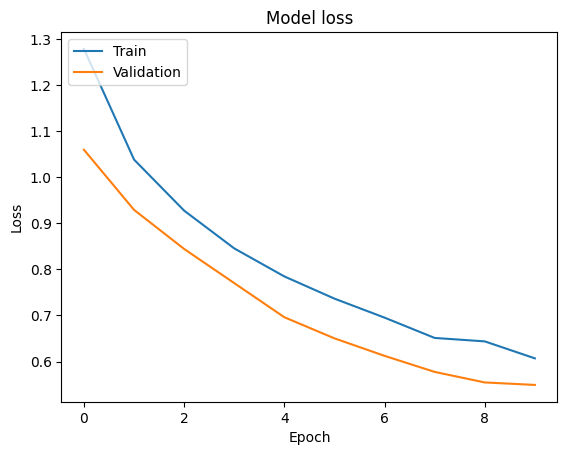

In [93]:
# Results

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate model on test data
test_loss, test_acc = shallow_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Get model predictions
y_pred_probs = shallow_cnn.predict(X_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.7888 - loss: 0.5482
Test Accuracy: 0.7860
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


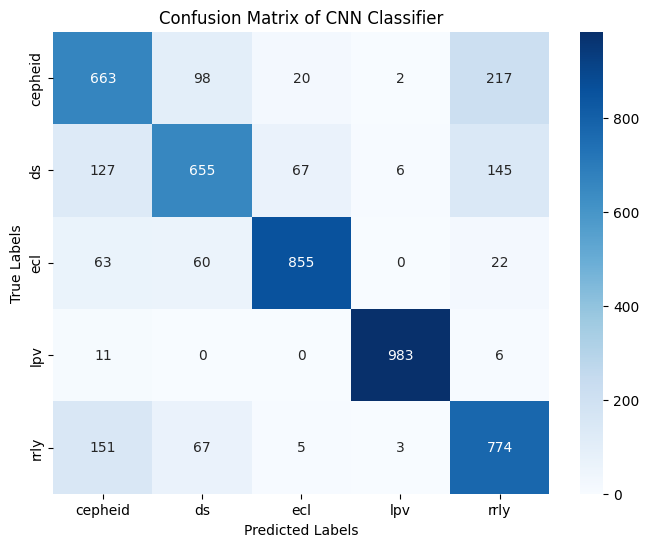

In [95]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Get class labels from dictionary
class_labels = list(class_to_int.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of CNN Classifier")
plt.show()


***EXPLORING DEEPER ARCHITECTURE***

*** Structure given in Mahabal ***

Listing 1. Convolutional Neural Network - deep

layers = [

InputLayer,

Conv2DLayer(64, size:3x3, rectify),

MaxPool2DLayer(2x2)),

DropoutLayer(0.1),

Conv2DLayer(128, size:5x5, rectify),

Conv2DLayer(256, size:5x5, rectify),

DenseLayer(512),

DropoutLayer(0.5),

DenseLayer(512),

DenseLayer(all, softmax),

]

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, InputLayer

def build_deep_cnn (input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

This deeper architecture is inspired by the given listing in Mahabal+2017. Compared to the shallow structure, additional convolutional layers have been incorporated to improve feature extraction. The number of epochs has been increased to 15 to allow for better learning while balancing training time and overfitting. These modifications aim to enhance classification accuracy by capturing more complex patterns in the light curve data.

In [80]:
# Load dataset and split into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_and_split_data()

# Define model parameters
input_shape = (60, 60, 1)  # Grayscale images (dm-dt images)

# Build and compile the improved CNN model
improved_cnn = build_deep_cnn(input_shape, num_classes)

# Train the CNN
history = improved_cnn.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=64)

# Evaluate on test set
test_loss, test_acc = improved_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model
improved_cnn.save("improved_cnn_model.h5")


Training: (15000, 60, 60, 1), Validation: (5000, 60, 60, 1), Test: (5000, 60, 60, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 537ms/step - accuracy: 0.3233 - loss: 1.4398 - val_accuracy: 0.5662 - val_loss: 1.0330
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 507ms/step - accuracy: 0.5366 - loss: 1.0649 - val_accuracy: 0.6278 - val_loss: 0.8580
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 510ms/step - accuracy: 0.6044 - loss: 0.8941 - val_accuracy: 0.6806 - val_loss: 0.7754
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 501ms/step - accuracy: 0.6388 - loss: 0.8315 - val_accuracy: 0.6854 - val_loss: 0.7293
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 497ms/step - accuracy: 0.6433 - loss: 0.8049 - val_accuracy: 0.7042 - val_loss: 0.7124
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 499ms/step - accuracy: 0.6743 - loss: 0.7507 - val_accuracy: 0.7132 - val_loss: 0.6700
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 498ms/step - accuracy: 0.6768 - loss: 0.7545 - val_accuracy: 0.7194 - val_loss: 0.6670
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 504ms/step - accuracy: 0.6866 -

Test Accuracy: 0.7570


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step


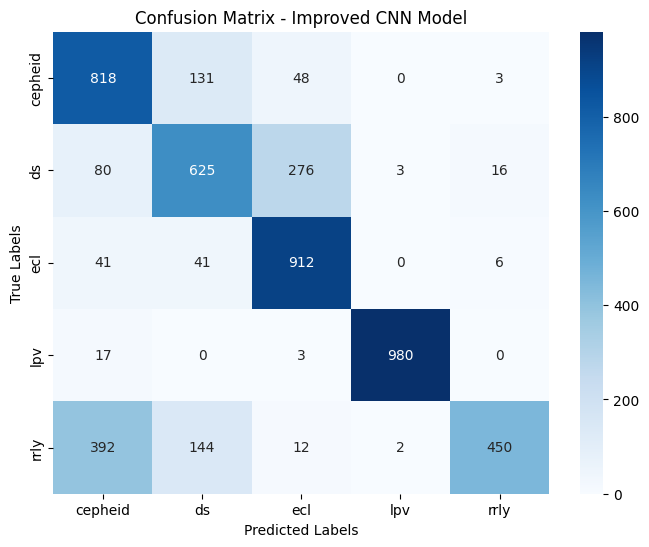

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load trained CNN model
from tensorflow.keras.models import load_model
model = load_model("improved_cnn_model.h5")

# Predict class labels for test data
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # True labels

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Get class labels from dictionary
class_labels = list(class_to_int.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Improved CNN Model")
plt.show()

The resulting accuracy suggests that the deep model might be **overfitting** due to excessive parameters or is **not optimized well** for the dataset. To improve, we can try **adding L2 regularization, adjusting dropout, lowering the learning rate, or adjust the layers.**

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, InputLayer

def improve_deep_cnn(input_shape, num_classes):
    model = Sequential([
        InputLayer(input_shape=input_shape),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')

    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [100]:
# Load dataset and split into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_and_split_data()

# Define model parameters
input_shape = (60, 60, 1)  # Grayscale images (dm-dt images)

# Build and compile the improved CNN model
deep_cnn = improve_deep_cnn(input_shape, num_classes)

# Train the CNN
history = deep_cnn.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val), batch_size=64)

# Evaluate on test set
test_loss, test_acc = deep_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the trained model
deep_cnn.save("deep_cnn_model.h5")

Training: (15000, 60, 60, 1), Validation: (5000, 60, 60, 1), Test: (5000, 60, 60, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 157s 660ms/step - accuracy: 0.3349 - loss: 1.4642 - val_accuracy: 0.5190 - val_loss: 1.1157
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 199s 646ms/step - accuracy: 0.5087 - loss: 1.1349 - val_accuracy: 0.6034 - val_loss: 0.9708
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 646ms/step - accuracy: 0.5619 - loss: 0.9985 - val_accuracy: 0.6464 - val_loss: 0.8666
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 206s 664ms/step - accuracy: 0.6272 - loss: 0.8847 - val_accuracy: 0.6592 - val_loss: 0.7970
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 209s 694ms/step - accuracy: 0.6528 - loss: 0.8305 - val_accuracy: 0.7168 - val_loss: 0.7542
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 192s 651ms/step - accuracy: 0.6663 - loss: 0.7873 - val_accuracy: 0.7050 - val_loss: 0.7201
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 210s 686ms/step - accuracy: 0.6778 - loss: 0.7666 - val_accuracy: 0.7276 - val_loss: 0.6859
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 676ms/step - accuracy: 0.6940 -

Test Accuracy: 0.7748


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate model on test data
test_loss, test_acc = deep_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Get model predictions
y_pred_probs = deep_cnn.predict(X_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels


157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.7743 - loss: 0.6065
Test Accuracy: 0.7748
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step


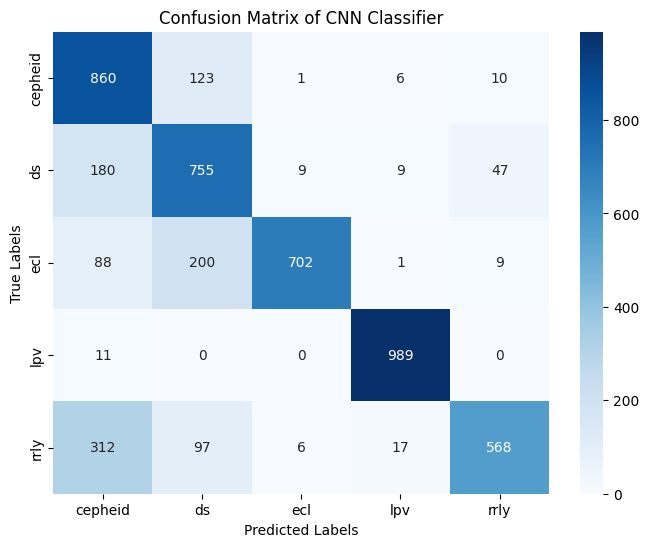

In [110]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Get class labels from dictionary
class_labels = list(class_to_int.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of CNN Classifier")
plt.show()

* Using deeper architectures can enhance the model's performance and accuracy.  
* It came with challenges such as overfitting and very long training times.
* Using dropout layers, adjusting learning rate and  normalization can help leverage the advantages of depth while addressing some of the associated challenges.